## K Means  Clustering Algorithm

In [2]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score  #performance metric

### we will not take y variable ,only consider X (independent features) in this K-Means implementation

In [4]:
# Generating sample data (2D points)
X, y = make_blobs(n_samples=1000, centers=3,n_features=2, random_state=42)
#here we will focus on X (indep variable) not y (target variable/dependent feature) ,as this library will take X and y automatically but we will focus on X variable

In [5]:
make_blobs()

(array([[ 2.10198363,  6.1364234 ],
        [ 2.78316887, -0.42440378],
        [-1.92178293,  9.58998359],
        [ 2.83258154,  6.64245003],
        [ 1.68246096,  6.84446527],
        [-1.82171475, 10.54322555],
        [ 2.314107  , -0.68405267],
        [-2.46178329, 10.62021428],
        [-2.69321778,  8.81246231],
        [ 4.26155087,  8.65124373],
        [ 2.14882688,  8.64898111],
        [-4.55710021, 10.46362101],
        [ 3.66412116, -1.17997453],
        [ 2.72135722,  7.7323925 ],
        [-3.09264434, 11.15811135],
        [ 3.39684233,  0.36903167],
        [-1.92825418,  9.20303819],
        [-2.17528992,  9.94725652],
        [-2.95803664,  9.85179173],
        [ 0.90621073, -1.06207547],
        [ 3.62989355,  6.32547533],
        [ 0.80029997,  0.18810513],
        [ 1.03614833,  0.48880553],
        [-4.58271507,  8.86313601],
        [ 2.33892839,  8.7112794 ],
        [-1.17798903,  9.3859351 ],
        [-2.71848003,  8.50583934],
        [-2.14671605, 10.300

In [6]:
X.shape #so total 1000 rows(datapoints) and 2 columns(2 features)

(1000, 2)

In [7]:
y.shape  #won't take this

(1000,)

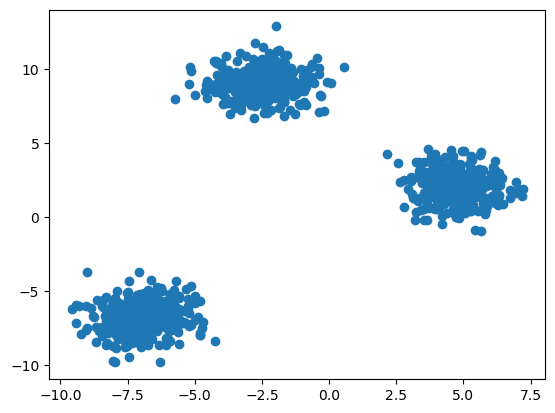

In [8]:
plt.scatter(X[:,0],X[:,1])  #so total three centroids we will be having as we mentioned above centre=3

In [9]:
X_train, X_test = train_test_split(X, test_size=0.33, random_state=42)  #(ignoring y)

In [10]:
## Manual Process 
## Elbow Method to select the K value for creating centroids

wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')  #The number of clusters to form as well as the number of centroids to generate.
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

C:\Users\subham.mehta\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\subham.mehta\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\subham.mehta\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\subham.mehta\AppData\Local\anaconda3\Lib\site-packages\sklearn\c

In [11]:
wcss #so we got 10 wcss values and its decreasing down the line

[44450.72387542038,
 12741.823357662122,
 1329.7219815435358,
 1176.3508442231273,
 1099.4408432290988,
 1063.0024306709606,
 775.6555207512047,
 675.9042944562774,
 601.6251398093848,
 590.7114305544064]

In [12]:
#after geting wcss we can use Kneelocator library instead of using graph and checking manually 

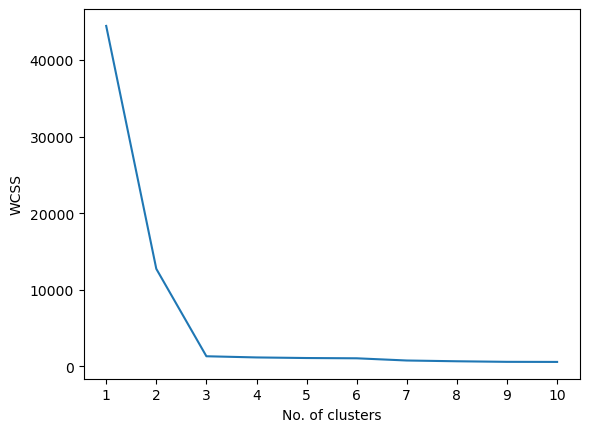

In [13]:
# now we will plot the elbow curve to see the bent
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("No. of clusters")
plt.ylabel("WCSS")
plt.show()

### so from graph we could see at k=3 bend is made and after that it got stabilized

In [15]:
# so value K=3 we got
kmeans=KMeans(n_clusters=3,init='k-means++')
y_labels=kmeans.fit_predict(X_train)  #as we have to find the labels for X_train data so use fit_predict (i.e. first fitting the data and then predicting)


C:\Users\subham.mehta\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


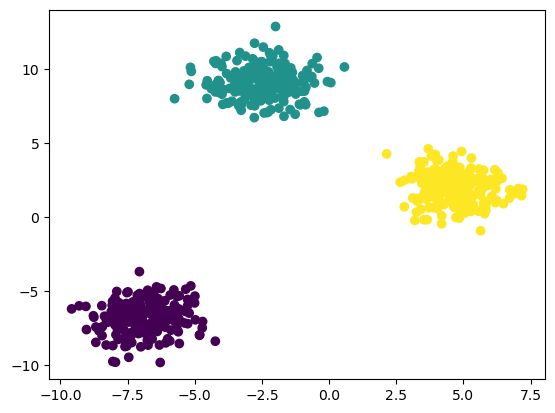

In [16]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

In [17]:
## Now for Test data
y_test_label=kmeans.predict(X_test)  #for test dataset we will use predict only

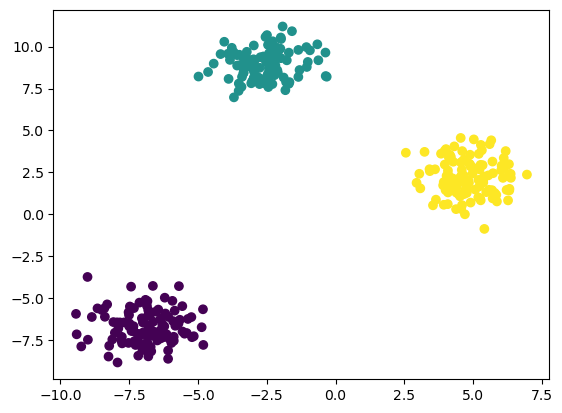

In [18]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test_label)

### But for larger data we cant find K value manually ,so doing automation now of K value selection

In [20]:
#knee locator will find K value automatically 
!pip install kneed

In [21]:
from kneed import KneeLocator

In [22]:
kl=KneeLocator(x=range(1,11),y=wcss,curve='convex',direction='decreasing') #convex bcz it is dcreasing (parabola shape) and wcss already above we got 

In [23]:
kl.elbow  #so we got k=3 here as well just like manually we got

3

## Perforkmance Metric [Silhoutte Score]

The silhouette score is a measure of how similar a data point is to its own cluster compared to other clusters. You can calculate it using the silhouette_score function from the sklearn.metrics module.

In [56]:
# Calculate Silhouette Score for trainig data X_train

silhouette_coefficients=[]
#notice we start at 2 clusters for silhouette coefficient
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train)
    sil_score = silhouette_score(X_train, kmeans.labels_)
    silhouette_coefficients.append(sil_score)

C:\Users\subham.mehta\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\subham.mehta\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\subham.mehta\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\subham.mehta\AppData\Local\anaconda3\Lib\site-packages\sklearn\c

In [27]:
silhouette_coefficients  #it ranges from -1 to 1 and best score is close to 1 or = 1

[0.7024009416893275,
 0.8417121581954964,
 0.6570668905604088,
 0.4746718652211686,
 0.3243559329929086,
 0.3259971685810666,
 0.3352272553797628,
 0.3335459118811603,
 0.33238524157710103]

Output:
The silhouette score will be printed in the console. A score close to 1 indicates well-defined clusters, while a score close to -1 suggests incorrect clustering.

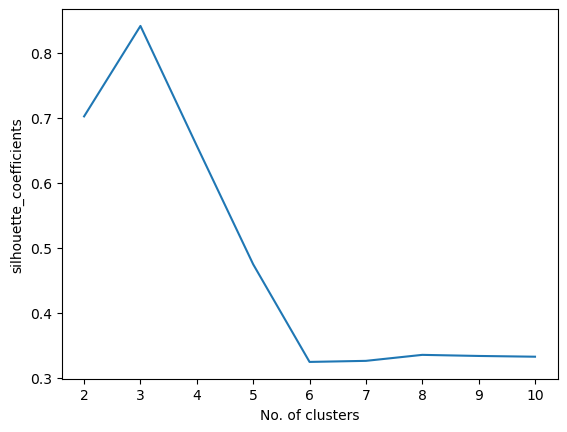

In [29]:
# plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("No. of clusters")
plt.ylabel("silhouette_coefficients")
plt.show()

### so from graph we could see for K=3 we have maximum silhouette score and hence k=3 is right

In [51]:
'''
Summary of KMeans Algorithm : 

K-Means is a clustering algorithm that partitions data into K clusters by minimizing the distance between points and their assigned centroids.
It is fast, simple, and effective but requires specifying the number of clusters in advance and is sensitive to outliers.
The optimal number of clusters can be determined using the elbow method or the silhouette score.

'''

'\nSummary of KMeans Algorithm : \n\nK-Means is a clustering algorithm that partitions data into K clusters by minimizing the distance between points and their assigned centroids.\nIt is fast, simple, and effective but requires specifying the number of clusters in advance and is sensitive to outliers.\nThe optimal number of clusters can be determined using the elbow method or the silhouette score.\n\n'